# Generating the arrival and departure distributions of EVs at a parking lot.

This notebook is the prototype notebook for `distributions.py`. 

This notebook explores generation of arrival and departure distributions of EVs at a parking lot using convolutions of normal and weibull distributions. The parameters for the distributions are based on this paper: https://www.mdpi.com/1996-1073/13/19/5003.

The arrival and departure distributions are convolution distributions. The convolution of two distributions represents the probability distribution of the sum of random variables drawn from each of the original distributions.

We first generate realizations of the respective distributions. Then we sum the random variables of the distributions up accordingly. A KDE is then applied to the resulting distribution to infer the parameters that represents the probability distribution. Then we sample arrival and departure times from the KDE distributions.

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# create normal distribution with defined mean and standard deviation
def normal_distribution(mean, std, size):
    return np.random.normal(mean, std, size)

# create weibull distribution with defined shape and scale
def weibull_distribution(shape, Lambda, size):
    return np.random.weibull(shape, size) * Lambda
    


In [4]:
nStations = 300000

# sum of two populations has to be equal to nStations
narrival1 = round(0.79 * nStations)
narrival2 = round(0.21 * nStations)
ndeparture1 = round(0.32 * nStations)
ndeparture2 = round(0.68 * nStations)

# if sum of two populations is not equal to nStations, fill the gap with one of the populations
while (narrival1 + narrival2) != nStations:
    if (narrival1 + narrival2) < nStations:
        # randomly choose one of the two populations
        if np.random.randint(0, 2) == 0:
            narrival1 += 1
        else:
            narrival2 += 1
    else:
        # randomly choose one of the two populations
        if np.random.randint(0, 2) == 0:
            narrival1 -= 1
        else:
            narrival2 -= 1

while (ndeparture1 + ndeparture2) != nStations:
    # randomly choose one of the two populations
    if (ndeparture1 + ndeparture2) < nStations:
        if np.random.randint(0, 2) == 0:
            ndeparture1 += 1
        else:
            ndeparture2 += 1    
    else:
        if np.random.randint(0, 2) == 0:
            ndeparture1 -= 1
        else:
            ndeparture2 -= 1

# define normal distribution parameters for arrival distribution
mean_arrival1 = 9 + 15/60
std_arrival1 = 1 + 30/60
mean_arrival2 = 14 + 45/60
std_arrival2 = 1 + 15/60

# define weibull distribution parameters for departure distribution
Lambda_departure1 = 12 + 15/60
shape_departure1 = 14 + 45/60
Lambda_departure2 = 17 + 45/60
shape_departure2 = 15 + 15/60

# create arrival normal distribution as sum of two normals
normal_arrival1 = normal_distribution(mean=mean_arrival1, std=std_arrival1, size=narrival1)
normal_arrival2 = normal_distribution(mean=mean_arrival2, std=std_arrival2, size=narrival2)


# create weibull distributions
weibull_departure1 = weibull_distribution(Lambda=Lambda_departure1, shape=shape_departure1, size=ndeparture1)
weibull_departure2 = weibull_distribution(Lambda=Lambda_departure2, shape=shape_departure2, size=ndeparture2)

In [5]:

# create arrival distribution by concatenating the two normals
arrival_distribution =  np.concatenate((normal_arrival1, normal_arrival2))

# create departure distribution by concatenating the two weibulls
departure_distribution = np.concatenate((weibull_departure1, weibull_departure2))

In [6]:
# fit the distributions with kernel density estimation
arrival_distribution_kde = scipy.stats.gaussian_kde(arrival_distribution)
departure_distribution_kde = scipy.stats.gaussian_kde(departure_distribution)


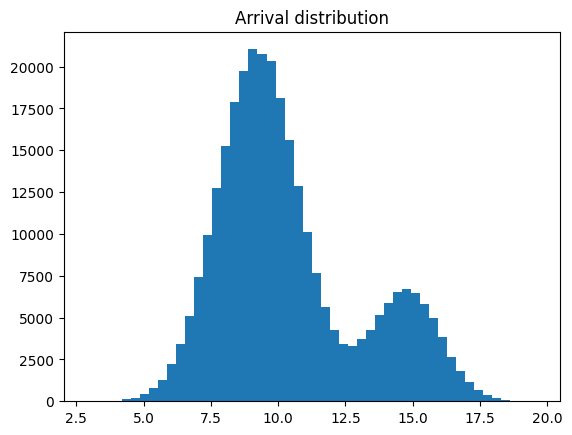

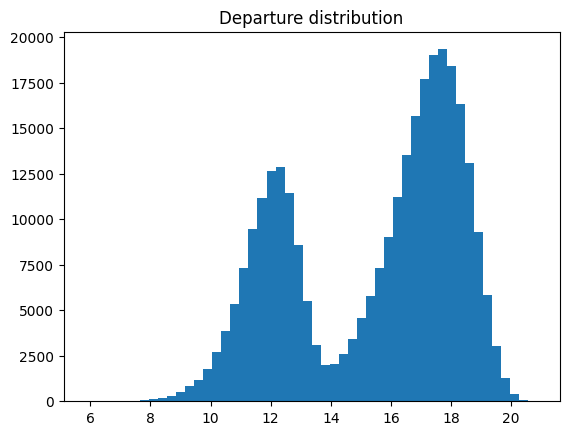

In [7]:
# plot arrival distribution
plt.hist(arrival_distribution, bins=50)
plt.title("Arrival distribution")
plt.show()

# plot departure distribution
plt.hist(departure_distribution, bins=50)
plt.title("Departure distribution")
plt.show()


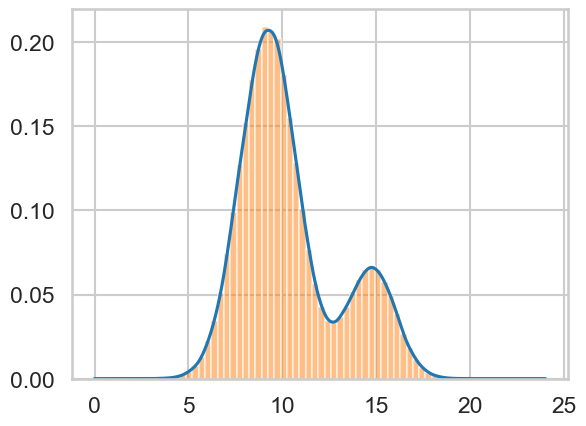

In [8]:
#  visualize the distributions
sns.set_style("whitegrid")
sns.set_context("talk")

# create a grid of 1000 points between 0 and 24 hours
x = np.linspace(0, 24, 1000)

# plot the arrival distribution kde on top of the histogram 
plt.plot(x, arrival_distribution_kde(x), label="Arrival distribution")
_ = plt.hist(arrival_distribution, bins=50, density=True, alpha=0.5)

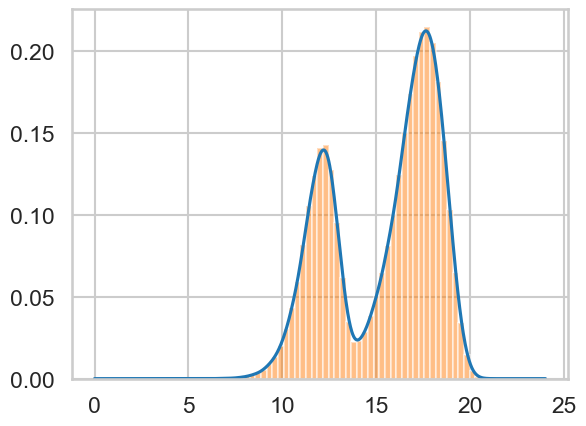

In [9]:
# plot the departure distribution kde on top of the histogram
plt.plot(x, departure_distribution_kde(x), label="Departure distribution")
_ = plt.hist(departure_distribution, bins=50, density=True, alpha=0.5)

In [10]:
#  draw samples from the arrival distribution
arrival_samples = arrival_distribution_kde.resample(300)

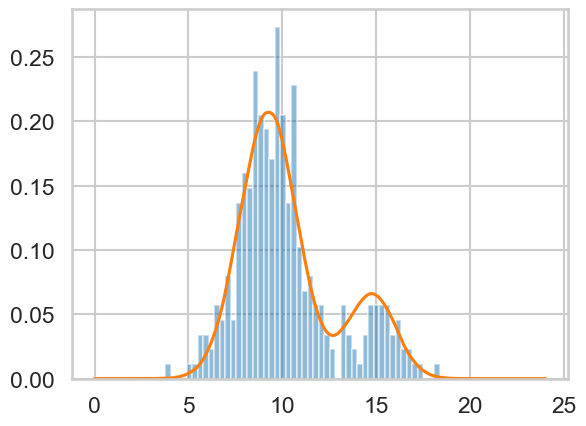

In [11]:
# plot the arrival_samples hist on top of the arrival distribution kde
plt.hist(arrival_samples[0], bins=50, density=True, alpha=0.5)
plt.plot(x, arrival_distribution_kde(x), label="Arrival distribution")


In [54]:
# make arrival and departure pairs, using the arrival kde and distribution kde
# to sample the arrival and departure times
# departure time has to be greater than arrival time
arrival_times = []
departure_times = []
for i in range(300):
    arrival_time = int(arrival_distribution_kde.resample(1)[0][0])
    departure_time = int(departure_distribution_kde.resample(1)[0][0])
    while (departure_time - arrival_time) < 3:
        departure_time = int(departure_distribution_kde.resample(1)[0][0])

    print("duration: ", departure_time - arrival_time)
    arrival_times.append(arrival_time)
    departure_times.append(departure_time)

duration:  5
duration:  10
duration:  6
duration:  4
duration:  5
duration:  3
duration:  3
duration:  4
duration:  3
duration:  4
duration:  5
duration:  5
duration:  10
duration:  9
duration:  7
duration:  5
duration:  8
duration:  4
duration:  7
duration:  3
duration:  5
duration:  9
duration:  7
duration:  7
duration:  4
duration:  3
duration:  8
duration:  9
duration:  9
duration:  7
duration:  7
duration:  4
duration:  4
duration:  4
duration:  9
duration:  3
duration:  3
duration:  6
duration:  7
duration:  9
duration:  8
duration:  3
duration:  7
duration:  7
duration:  9
duration:  3
duration:  3
duration:  10
duration:  5
duration:  6
duration:  3
duration:  5
duration:  3
duration:  6
duration:  8
duration:  3
duration:  7
duration:  9
duration:  5
duration:  12
duration:  10
duration:  4
duration:  5
duration:  10
duration:  3
duration:  5
duration:  8
duration:  5
duration:  8
duration:  7
duration:  4
duration:  12
duration:  3
duration:  12
duration:  3
duration:  4
dura

In [55]:
# make a dataframe with arrival and departure times
df = pd.DataFrame({'arrival': arrival_times, 'departure': departure_times})

(array([58., 48., 32., 24., 40., 32., 29., 24.,  9.,  4.]),
 array([ 3. ,  3.9,  4.8,  5.7,  6.6,  7.5,  8.4,  9.3, 10.2, 11.1, 12. ]),
 <BarContainer object of 10 artists>)

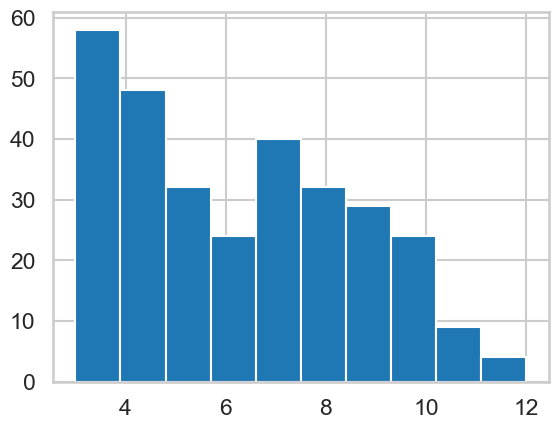

In [56]:
# calculate the difference between arrival and departure times
df['duration'] = df['departure'] - df['arrival']

# plot the duration distribution
plt.hist(df['duration'])

In [57]:
# plot unique values of duration
df['duration'].unique()

array([ 5, 10,  6,  4,  3,  9,  7,  8, 12, 11])

In [58]:
#  save arrival and departure times to csv
df.to_csv("Data/arrival_departure_times.csv", index=False)